# 死亡率の推定

In [2]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 表示する行の数を設定
pd.options.display.max_rows = 10
# matplotlib のフォントを設定
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

出生比率

In [3]:
# 出生率データをダウンロード
url = 'http://www.ipss.go.jp/p-toukei/JMD/00/STATS/Births.txt'
df_birth = pd.read_csv(url, skiprows=1, delim_whitespace=True)


In [4]:
df_birth.head()

,Year,Female,Male,Total
0,1947,1301806,1376986,2678792
1,1948,1303060,1378564,2681624
2,1949,1316630,1380008,2696638
3,1950,1134396,1203111,2337507
4,1951,1043048,1094641,2137689


In [5]:
df_birth_F = df_birth[['Year', 'Female']].copy()
df_birth_F.columns = ['year', 'l']
df_birth_F['sex'] = 'f'
df_birth_M = df_birth[['Year', 'Male']].copy()
df_birth_M.columns = ['year', 'l']
df_birth_M['sex'] = 'm'
df_birth = pd.concat([df_birth_F, df_birth_M], axis=0, ignore_index=True)

In [6]:
df_birth

,year,l,sex
0,1947,1301806,f
1,1948,1303060,f
2,1949,1316630,f
3,1950,1134396,f
4,1951,1043048,f
...,...,...,...
135,2012,531781,m
136,2013,527657,m
137,2014,515533,m
138,2015,515452,m


In [7]:
# 累積比率を計算
df_birth['ratio'] = df_birth['l'] / df_birth['l'].sum()
df_birth['cum_ratio'] = df_birth['ratio'].cumsum()
del df_birth['l']

In [8]:
df_birth

,year,sex,ratio,cum_ratio
0,1947,f,0.012150,0.012150
1,1948,f,0.012162,0.024311
2,1949,f,0.012288,0.036600
3,1950,f,0.010587,0.047187
4,1951,f,0.009735,0.056922
...,...,...,...,...
135,2012,m,0.004963,0.980769
136,2013,m,0.004925,0.985694
137,2014,m,0.004812,0.990505
138,2015,m,0.004811,0.995316


In [21]:
df_birth
df_birth.to_csv('./ipss_birth.csv', index = False)

累積比率と一様乱数を使った、男女別・誕生年別の割合の作成方法の概念図

Text(0.5, 1.0, 'Cumulative Ratio of Population Birth')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


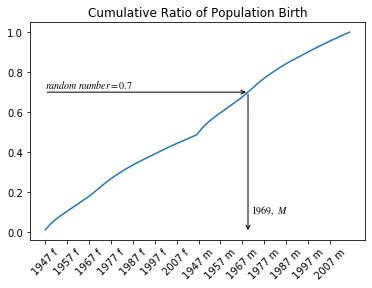

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = df_birth.index
y = df_birth['cum_ratio']
ax.plot(x, y)
xlabels = df_birth['year'].apply(str) + ' ' + df_birth['sex']
ax.set_xticks(x[::10])
ax.set_xticklabels(xlabels[::10], rotation='45')
# 水平矢印
ax.annotate(s='', xytext=[0, 0.7], xy=[92.57888, 0.7],
arrowprops=dict(arrowstyle='->', color='k'))
# 垂直矢印
ax.annotate(s='', xytext=[92.57888, 0.7], xy=[92.57888, 0],
arrowprops=dict(arrowstyle='->', color='k'))
# テキスト
ax.text(x=0, y=0.72, s='$random\ number=0.7$')
ax.text(x=94, y=0.1, s='$1969,\ M$')
# タイトル
ax.set_title('Cumulative Ratio of Population Birth')

In [23]:
x[::10]

RangeIndex(start=0, stop=140, step=10)

1年間生存する確率（死亡率）は $(1-q^m_x)^{12}$ 、１年間の死亡率は $1- (1-q^m_x)^{12}$

ここで、$q_x^m$ が小さい時、$ q_x > q_x^m $ という関係と、マクローリン展開により以下の近似が成り立つ。


$$
q_x = 1 − (1 − q_x^m)^{12} ≃ 1 − (1 − 12q_x^m ) = 12q_x^m
$$

In [31]:
# 国立社会保障・人口問題研究所の「日本版死亡データベース」(http://www.ipss.go.jp/p-toukei/JMD/00/index.html) から
url = 'http://www.ipss.go.jp/p-toukei/JMD/00/STATS/Mx_1x1.txt'
df_mortality = pd.read_csv(url, skiprows=1, delim_whitespace=True)
df_mortality

,Year,Age,Female,Male,Total
0,1947,0,0.087401,0.099181,0.093432
1,1947,1,0.033723,0.034697,0.034220
2,1947,2,0.016994,0.016804,0.016897
3,1947,3,0.011412,0.011461,0.011437
4,1947,4,0.006918,0.007337,0.007130
...,...,...,...,...,...
7765,2016,106,0.529461,0.715816,0.545618
7766,2016,107,0.609467,0.520147,0.602271
7767,2016,108,0.596024,0.874743,0.620184
7768,2016,109,0.667530,0.992392,0.693017


In [32]:
df_mortality.dtypes

Year       int64
Age       object
Female    object
Male      object
Total     object
dtype: object

In [33]:
df_mortality = df_mortality[df_mortality['Year'] == 2016].copy()
df_mortality['Age'].replace('110+', '110', inplace=True)
dict_types = {'Year': 'int16',
              'Age': 'int8',
              'Female': 'float64',
              'Male': 'float64',
              'Total': 'float64'}
df_mortality = df_mortality.astype(dict_types)

In [34]:
df_mortality

,Year,Age,Female,Male,Total
7659,2016,0,0.002028,0.001995,0.002011
7660,2016,1,0.000313,0.000340,0.000326
7661,2016,2,0.000174,0.000178,0.000176
7662,2016,3,0.000098,0.000133,0.000116
7663,2016,4,0.000087,0.000095,0.000091
...,...,...,...,...,...
7765,2016,106,0.529461,0.715816,0.545618
7766,2016,107,0.609467,0.520147,0.602271
7767,2016,108,0.596024,0.874743,0.620184
7768,2016,109,0.667530,0.992392,0.693017


In [35]:
del df_mortality['Year']
del df_mortality['Total']

In [39]:
df_mortality.columns = ('anb', "F", "M")

In [40]:
df_mortality

,anb,F,M
7659,0,0.002028,0.001995
7660,1,0.000313,0.000340
7661,2,0.000174,0.000178
7662,3,0.000098,0.000133
7663,4,0.000087,0.000095
...,...,...,...
7765,106,0.529461,0.715816
7766,107,0.609467,0.520147
7767,108,0.596024,0.874743
7768,109,0.667530,0.992392


ALB はx歳の誕生日を今日迎えた者から、明日でx+1歳になる人までを一様に含んでいると仮定すると、  
ALB x歳の ANB 基準平均年齢は x + 0.5歳です。

In [41]:
df_mortality['F'] = (df_mortality['F'] + df_mortality['F'].shift(-1))/2
df_mortality['M'] = (df_mortality['M'] + df_mortality['M'].shift(-1))/2
df_mortality.columns = ['alb', 'F', 'M']

In [42]:
df_mortality

,alb,F,M
7659,0,0.001170,0.001167
7660,1,0.000244,0.000259
7661,2,0.000136,0.000155
7662,3,0.000092,0.000114
7663,4,0.000085,0.000098
...,...,...,...
7765,106,0.569464,0.617981
7766,107,0.602745,0.697445
7767,108,0.631777,0.933568
7768,109,0.684252,1.113480


Text(0.5, 1.0, 'Mortalities')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


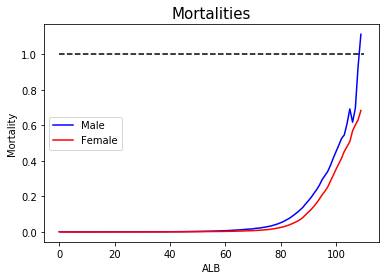

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_mortality.alb, df_mortality.M, c='b', label='Male')
ax.plot(df_mortality.alb, df_mortality.F, c='r', label='Female')
ax.plot([0, 110], [1, 1], c='k', ls='--')
ax.set_xlabel('ALB')
ax.set_ylabel('Mortality')
ax.legend(loc='best')
ax.set_title('Mortalities', fontsize=15)

In [48]:
df_mortality = df_mortality[df_mortality["alb"] < 100].copy()

In [49]:
df_mortality

,alb,F,M
7659,0,0.001170,0.001167
7660,1,0.000244,0.000259
7661,2,0.000136,0.000155
7662,3,0.000092,0.000114
7663,4,0.000085,0.000098
...,...,...,...
7754,95,0.209400,0.294640
7755,96,0.229304,0.317172
7756,97,0.252797,0.340451
7757,98,0.285820,0.374441


In [52]:
test = 1 - (1 - df_mortality['F'])**(12)

In [53]:
test

7659    0.013956
7660    0.002918
7661    0.001631
7662    0.001109
7663    0.001026
          ...   
7754    0.940368
7755    0.956087
7756    0.969713
7757    0.982393
7758    0.989996
Name: F, Length: 100, dtype: float64

年次死亡率に変換

In [54]:
df_mortality.loc[:, 'F'] = 1 - (1 - df_mortality['F'])**(1/12)
df_mortality.loc[:, 'M'] = 1 - (1 - df_mortality['M'])**(1/12)

In [55]:
df_mortality

,alb,F,M
7659,0,0.000098,0.000097
7660,1,0.000020,0.000022
7661,2,0.000011,0.000013
7662,3,0.000008,0.000010
7663,4,0.000007,0.000008
...,...,...,...
7754,95,0.019390,0.028668
7755,96,0.021471,0.031293
7756,97,0.023992,0.034089
7757,98,0.027662,0.038338


In [ ]:
df_mortality.to_csv('./public_stats/processed/ipss_mortality.csv', index=False)